<a href="https://colab.research.google.com/github/Suyash-28-commits/AIML-Project/blob/main/California_Housing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data_path="/content/drive/MyDrive/housing.csv"


In [ ]:
def load_housing_data(data_path): #Loading the data
  return pd.read_csv(data_path)

In [ ]:
housing = load_housing_data(data_path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info() #Checking the missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are a total of 20,640 instances in the dataset, but the feature total_bedrooms has 20,433 entries , so the remaining 207 districts have missing data

In [ ]:
#Checking what categories does ocean_proxemity store
housing["ocean_proximity"].value_counts() #Summary of each category in categoriacal attribute ocean_porximity

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
#Summary of each numerical attribute
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#Visualization of data
import matplotlib.pyplot as plt

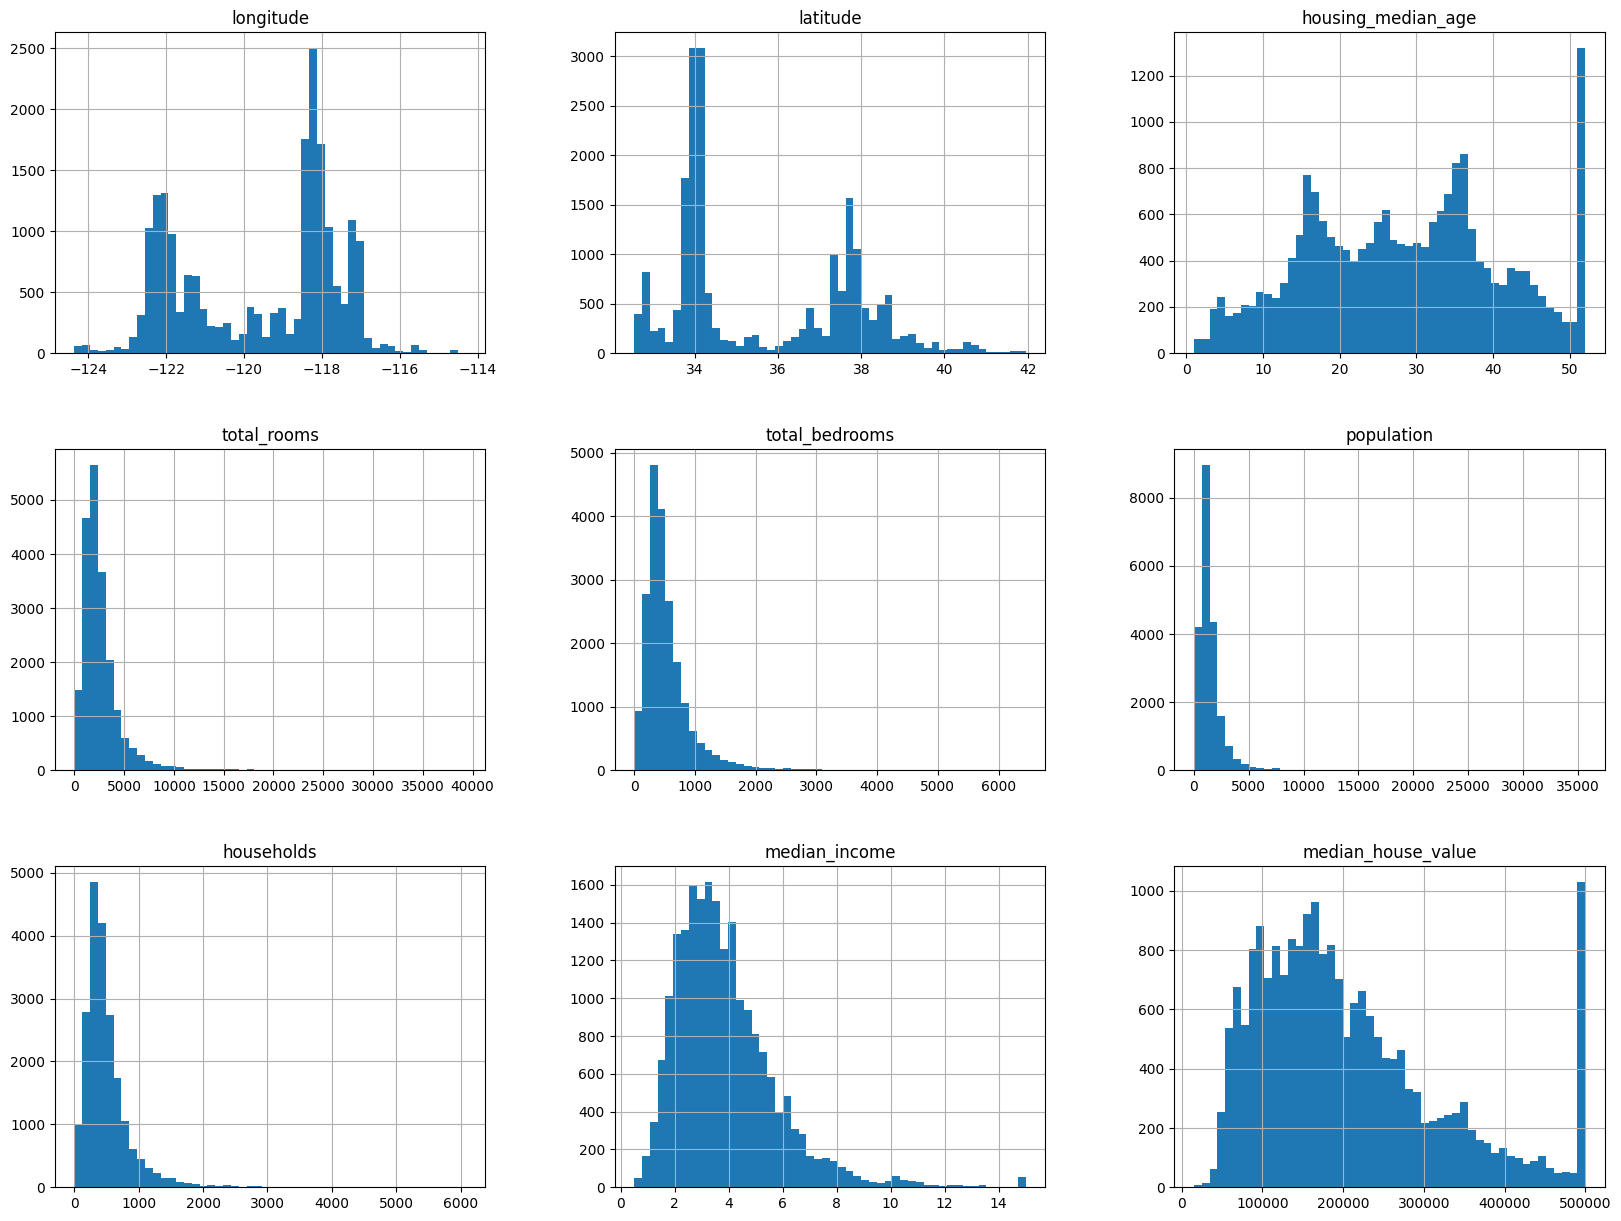

In [ ]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15)) #Generating hsitograms of all numerical values in the dataset
plt.show()


In [ ]:
#Separating training set and test set
# import numpy as np

# def split_train_test(data,test_ratio):
#   shuffled_indices =np.random.permutation(len(data))
#   test_set_size = int(len(data)*test_ratio)
#   test_indices = shuffled_indices[:test_set_size]
#   train_indices = shuffled_indices[test_set_size:]
#   return data.iloc[train_indices], data.iloc[test_indices]

# train_set , test_set = split_train_test(housing,0.2)

# len(train_set)


The above algorithm of separating test set and training set can't be used as it will always generate a random test set and taring set increasing the generalization error

In [ ]:
# len(test_set)

In [ ]:
#importing sklearn for splitting training set and test set
from sklearn.model_selection import train_test_split
train_test, test_set = train_test_split(housing,test_size=0.2,random_state=42)

<Axes: >

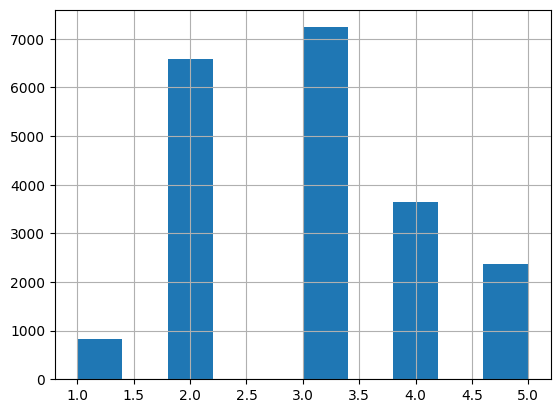

In [ ]:
#Stratified Sampling of data
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42);
for train_index , test_index in split.split(housing,housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

#Percentage of each strata by the use of stratified sampling
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [ ]:
#Dropping income_cat as our Startified sampling is done and it is no longer required
#income_cat was just a helper column for sampling according to strata(Stratified sampling)

for set_ in (strat_train_set,strat_test_set):
  set_.drop("income_cat",axis=1,inplace=True)

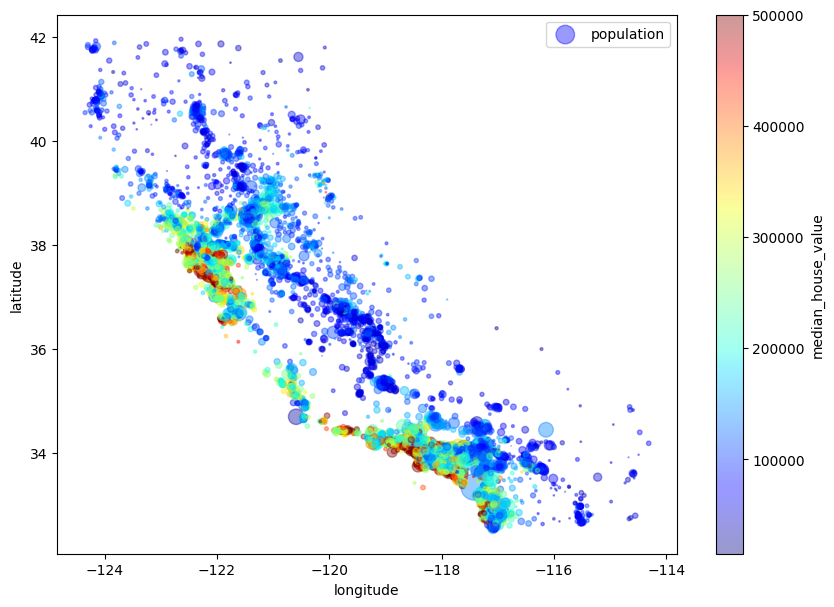

In [ ]:
#Visualization of training set
import matplotlib.pyplot as plt

housing = strat_train_set.copy();

#Visualiation of data Geographically
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
             s=housing["population"]/100,label="population",figsize=(10,7),
             c="median_house_value",cmap = plt.get_cmap("jet"),colorbar=True,
             )
plt.legend()

From the above visualization we can see that coastal areas have higher median house values

In [ ]:
#Looking for Correlations between attributes

corr_matrix = housing.select_dtypes(include=["number"]).corr() #Correlation matrix of housing data frame
#Correlation matrix is a matrix of coefficients(Pearson's r) between variables
""" 1->Positive correlation between the variables
    -1-> Negative Correlation between the variables
    0-> No correlation

    Pearson's r value ranges from -1 to +1
"""

#Detecting correlation between median_housing_value and all athe numeric features in teh dataset
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


from the above correlation matrix we can find out that median house_value has a strong correlation from median_income . So this can be said that as median income grows , median house value also grow

<Axes: xlabel='median_income', ylabel='median_house_value'>

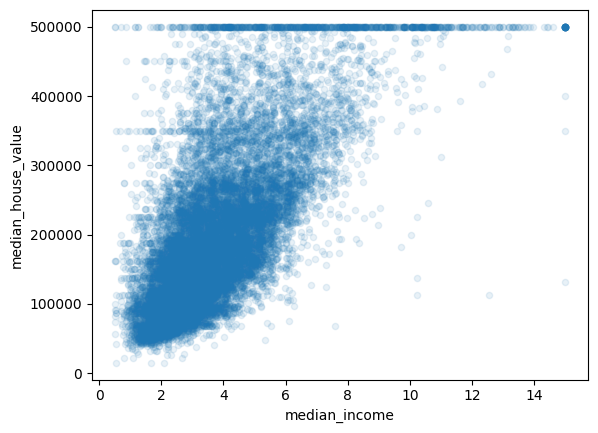

In [ ]:
#Plotting median_income v/s median_house_value to check the trends as the correlation between the attributes is more
housing.plot(kind="scatter", x ="median_income",y="median_house_value",alpha=0.1)

In [ ]:
#Preparing the data for Machine Learning Algorithms
#Separating features and labels

housing = strat_train_set.drop("median_house_value",axis=1)#Only contains features(Data Frame)
housing_labels = strat_train_set["median_house_value"].copy();#Only conatins labels(Series)

In [ ]:
#Removing all the missing values
#Method of replacing NaN values by median of the numerical features using SimpleImputer class

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity",axis=1) #removing catregorical type so that imputer works
imputer.fit(housing_num) #calculates the median values of nyumerical attributes of housing dataframe

imputer.statistics_ # returns an array of all the median values of attributes

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
X = imputer.transform(housing_num) #a 2-D array that stores the transformed version of housing_num
#Transfromed housing_num -> housing_num with all missing values filled with median of the corresponding features

In [ ]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)# storing the cleaned data in training housing datframe

In [ ]:
#Handling text and categorical attributes

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
#Converting text to numbers

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_ #ordinal_categories is a hyperparameter whereas ordianl_encoder.categories_ is a learned attribute

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
#One hot encoding for treating each attribute independently and as there is no relevance of order here
#Ordinal encoding is helpful where order is taken into relevance

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot #SciPy sparse matrix
housing_cat_1hot.toarray() # returns sparse matrix converted into numpy array

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
#Custom Transformer for adding more Attributes
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix,bedrooms_ix,population_ix,household_ix = 3,4,5,6 #features to be added in dataset

#ComninedAttributesAdder is inherhiting two classes BaseEstimator and TransformerMixin
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
  def __init__(self,add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
    population_per_household = X[:,population_ix] / X[:,household_ix]

    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
      return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
    else:
      return np.c_[X,rooms_per_household,population_per_household]

attr_adder= CombinedAttributesAdder(add_bedrooms_per_room=False) #not adding bedrooms_per_table feature
housing_extra_attribs = attr_adder.transform(housing.values)


In [ ]:
#Transformation Pipelines
#Pipeline Chain of multiple preprocessing steps or transformations by the use of transformers

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#In Pipeline Constructor it calls all the constructors of the transformers
#It is required that last constructor to be called should be a transformer

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),#Standardization or Normalization of all features such that the scale of features isn't variable
])

""""
Standardization or Normalization:

z = x - u/σ
where:
   z = Standerdized value
   x = a single value(e.g. one element in a column)
   u = mean of the feature(column)
   σ = standard deviation of the feature
"""
# Added all the transformations on the training test(containing only numerical attributes)
#1-> Filled missing values with medain of that column using Imputer transformer
#2-> Added features into the dataset using a custom Transfromer which follows scikitlearn duck typing
#3-> Scaled the values using Standardization (Feature Scaling)
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
#Combining all the pipelines

from sklearn.compose import ColumnTransformer

nums_attribs = list(housing_num)
cat_attribs =["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline,nums_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])
#One Hot Encoder returns a sparse matrix which stores location of non-xero elements and it conatins more zero elements
#Dense matrix stores non-zero elements and can store 0 also
#Only difference between both of them is how they store data
#Dense Matrix stores data explicitly whereas a Sparse Matrix stores only the location of non-zero elements for better computation and less memory usage

housing_prepared = full_pipeline.fit_transform(housing) #returns a dense matrix
#full_pipeline here gets two matrices : a Sparse Matrix (OneHotEncoder transfromer) and a Dense Matrix(from num_pipeline)
"""When there is such a mix of sparse and dense matrices, the Column Transformer estimates the density of the final matrix (i.e., the ratio of nonzero
cells), and it returns a sparse matrix if the density is lower than a given threshold (by
default, sparse_threshold=0.3)"""

'When there is such a mix of sparse and dense matrices, the Column Transformer estimates the density of the final matrix (i.e., the ratio of nonzero\ncells), and it returns a sparse matrix if the density is lower than a given threshold (by\ndefault, sparse_threshold=0.3)'

In [ ]:
#Training and Evaluating on the Training set
#importing Linear Regression Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)#Fitting the training data into the Linear Regression Model

LinearRegression()

In [ ]:
#Checking the predictions of Linear Regression Model
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions",lin_reg.predict(some_data_prepared))
print("Labels",list(some_labels))


Predictions [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
#Calculating the RMSE(Root Mean Square Error) of the linear regression model
#Evaluating the model trained on tarining set by testing it on same training data
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

In [ ]:
#This is an example of model underfitting the training data
#The above Linear Regression model has underfitted the training data
#Choosing a more powerful model -Decison Tree Regression

In [ ]:
#training the model on Decision Trees
from sklearn.tree import DecisionTreeRegressor
#Decison Tree Regresor -> Estimator but not a transformer

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [ ]:
#Prediction using Decision Trees Regressor

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse # 0 percent error

np.float64(0.0)

In [ ]:
#Better Evaluation using Cross Validation
#K-Fold Cross Validation
"""In this validation , there is a random spiltting of data into k distinct subsets(folds) (10 here),
   then it trains and evaluates the model k times(10 times here),picking a different fold for evaluation every time
   and training on the other (k-1) folds (9 folds)

   The result is an array of k evaluation scores

"""
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error", cv=10)
#returns an array of negative scores of each cross validation(10 here)
tree_rmse_scores = np.sqrt(-scores)#RMSE

def display_scores(scores):
  print("Scores: ",scores)
  print("Mean: ",scores.mean())
  print("Standard Deviation: ",scores.std())

display_scores(tree_rmse_scores)



Scores:  [73932.25231252 69247.45471525 67620.49293826 72766.97598158
 70053.8475214  77416.59606015 71398.85257172 73437.17794126
 68490.08078546 69998.44815473]
Mean:  71436.21789823422
Standard Deviation:  2824.52756965292


In [ ]:
#The K-fold Cross Validation done on Decision Tree Regression model show that the model has overfitted the data

In [ ]:
#Doing K-Fold Cross Validation on the Linear Regression Model
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Deviation:  2880.3282098180694


In [ ]:
#Random Forest Regressor
#trains many Decision trees on random subsets of the features and then avergage out the predictions
#comes under Ensemble LEarning(building a Ml Model on top of other models)

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores:  [51629.72039101 49117.69053855 46926.81207751 52074.05476609
 47752.8302736  51943.40008134 52005.72347317 50068.82478234
 48843.81741354 53578.17778961]
Mean:  50394.10515867628
Standard Deviation:  2064.5050395062112


In [ ]:
#this shows that Random forest Regressor also overfits the data
#however , it performs better than decsision trees
#Condition for overfitting the training data-> Training RMSE->low but Validation RMSE -> High
#Condition for underfitting the training data-> Training RMSE->high and Validation RMSE -> High


In [ ]:
#Tuning our model to get the best value of hyperparameters
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

62972.0588229337 {'max_features': 2, 'n_estimators': 3}
55308.784902383486 {'max_features': 2, 'n_estimators': 10}
52899.66656558173 {'max_features': 2, 'n_estimators': 30}
59919.51955702769 {'max_features': 4, 'n_estimators': 3}
52817.60902631664 {'max_features': 4, 'n_estimators': 10}
50586.772442999485 {'max_features': 4, 'n_estimators': 30}
58581.04425884367 {'max_features': 6, 'n_estimators': 3}
52478.037784679 {'max_features': 6, 'n_estimators': 10}
49922.27518890478 {'max_features': 6, 'n_estimators': 30}
58197.15486653802 {'max_features': 8, 'n_estimators': 3}
52390.70648141496 {'max_features': 8, 'n_estimators': 10}
49936.18450256611 {'max_features': 8, 'n_estimators': 30}
61730.55067785138 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54284.136086161576 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59604.30172673704 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52678.725833396886 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [ ]:
#Evaluating system on test set
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis =1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

47621.69396118489


In [4]:
!pip install ipynbname

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.8 MB/s eta 0:00:00


In [5]:
import ipynbname
nb_path = ipynbname.path()
print(f"Current notebook path: {nb_path}")

Current notebook path: /fileId=1AApvaq7m870FPaHdesYs_FJMtzVVxKvF


In [9]:
import json

# Path to the notebook you want to fix
file_path = "/content/drive/MyDrive/Colab Notebooks/California_Housing_Prediction.ipynb"

# Load the notebook as a JSON object
with open(file_path, "r", encoding="utf-8") as f:
    notebook_data = json.load(f)

# Remove broken widgets from metadata if they exist
if "widgets" in notebook_data.get("metadata", {}):
    print("Fixing metadata.widgets...")
    del notebook_data["metadata"]["widgets"]

# Save the cleaned notebook
with open(file_path, "w", encoding="utf-8") as f:
    json.dump(notebook_data, f, indent=1)

print("Notebook fixed and saved successfully.")


Notebook fixed and saved successfully.
